# Breast Cancer Classification with EDA

In [66]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz 


# download migwin : https://mingw.w64.org/doku.php/download/mingw-builds
# install this in your system and keep the path as migw_path = 'Installed path'
# mingw_path = ''
# os.inviron['PATH'] = mingw_path + ';' + os.inviron['PATH']

import os
os.environ['PATH'] += os.pathsep + r'C:\\Users\\Diwakar\\AppData\\Local\\Continuum\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'


In [68]:
data = pd.read_csv("D:\\Data Science\\Dataset\\Breast_cancer_data.csv")

data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [69]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [70]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


# Exploratory Data Analysis

In [71]:
data.nunique()

mean_radius        456
mean_texture       479
mean_perimeter     522
mean_area          539
mean_smoothness    474
diagnosis            2
dtype: int64

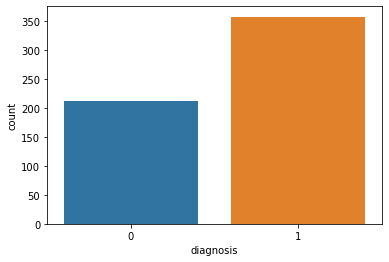

In [72]:
sns.countplot(x="diagnosis", data=data)


In [73]:
data.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
sns.pairplot(data, hue= "diagnosis",,diag_kind="hist", markers="+")

# Classification

In [75]:
X= data.iloc[:,:5].values
y= data.iloc[:,-1].values

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [78]:
y_pred=neigh.predict(X_test)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



[Text(220.59915254237288, 206.56799999999998, 'X[3] <= 696.25\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(143.28305084745762, 184.824, 'X[2] <= 90.115\ngini = 0.22\nsamples = 397\nvalue = [50, 347]'),
 Text(86.53728813559322, 163.07999999999998, 'X[4] <= 0.109\ngini = 0.129\nsamples = 332\nvalue = [23, 309]'),
 Text(36.884745762711866, 141.336, 'X[1] <= 19.615\ngini = 0.067\nsamples = 287\nvalue = [10, 277]'),
 Text(11.349152542372881, 119.592, 'X[4] <= 0.1\ngini = 0.01\nsamples = 206\nvalue = [1, 205]'),
 Text(5.6745762711864405, 97.848, 'gini = 0.0\nsamples = 156\nvalue = [0, 156]'),
 Text(17.023728813559323, 97.848, 'X[4] <= 0.1\ngini = 0.039\nsamples = 50\nvalue = [1, 49]'),
 Text(11.349152542372881, 76.10399999999998, 'X[2] <= 67.535\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(5.6745762711864405, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(17.023728813559323, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(22.6983

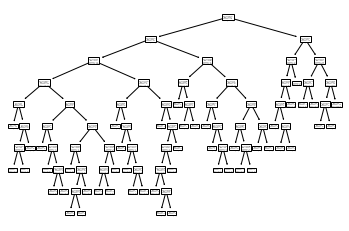

In [80]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf) 

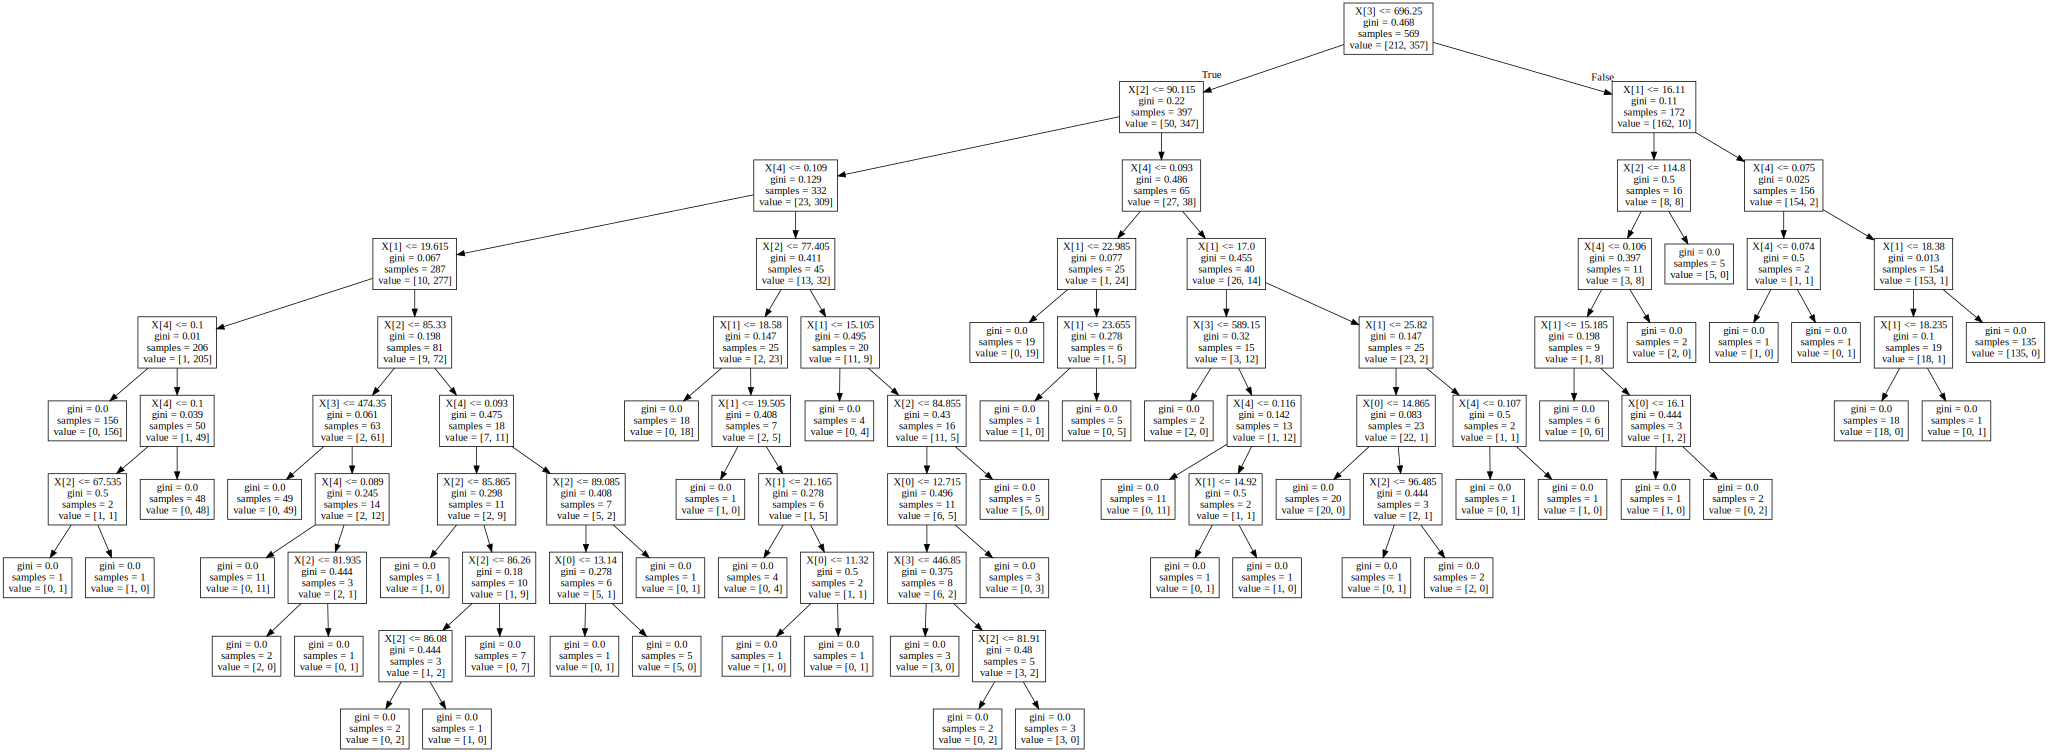

In [81]:
dot_data = tree.export_graphviz(clf, out_file=None) 

graph = graphviz.Source(dot_data)
graph

In [82]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        90

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143

